In [1]:
%pwd

'/home/larry/tensorflow_prac'

In [2]:

import tensorflow as tf


In [3]:


saver=tf.train.import_meta_graph("/tmp/my_model_final.ckpt.meta")

weii = tf.get_default_graph().get_tensor_by_name("weights:0")
biass = tf.get_default_graph().get_tensor_by_name("bias:0")


In [20]:
with tf.Session() as sess:
    saver.restore(sess, "/tmp/my_model_final.ckpt")  # this restores the graph's state
    weight_=sess.run(weii)
    bias_=sess.run(biass)
    print(sess.run(weii[:2]))
    print(sess.run(biass))

INFO:tensorflow:Restoring parameters from /tmp/my_model_final.ckpt
[[-0.01245792  0.00331582 -0.00829825 -0.00028865  0.00158193  0.00511413
  -0.00253649 -0.01452493  0.00950201  0.00042995]
 [ 0.00461457  0.00137883 -0.00313518 -0.00309132  0.01138637 -0.00639368
  -0.00088129 -0.00605541  0.0302855  -0.00453134]]
[[-1.5082908   1.6472019   0.39442837 -0.85935885  0.4367421   2.5366068
  -0.76324207  1.6696063  -2.5577936  -0.6650963 ]]


## how to use the restored weight and bias to do application ?

In [12]:
import utils
import numpy as np

In [17]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [7]:
# Step 1: Read in data
mnist_folder = 'data/mnist'
utils.download_mnist(mnist_folder)
_, _, test = utils.read_mnist(mnist_folder, flatten=True)

data/mnist/train-images-idx3-ubyte.gz already exists
data/mnist/train-labels-idx1-ubyte.gz already exists
data/mnist/t10k-images-idx3-ubyte.gz already exists
data/mnist/t10k-labels-idx1-ubyte.gz already exists


In [9]:
type(test)

tuple

In [8]:
test_image=test[0]

In [10]:
test_image.shape

(10000, 784)

In [15]:
test_image[0].shape

(784,)

In [13]:
ttimg=np.array([test_image[0]])

In [16]:
ttimg.shape

(1, 784)

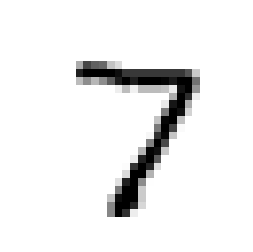

In [18]:
pic = ttimg
pic = pic.reshape(28, 28)
plt.imshow(pic, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")

#save_fig("some_digit_plot")
plt.show()

### can we recognize this number using our stored weights and bias ?

In [22]:
wei=tf.constant(weight_)
bbs=tf.constant(bias_)
imm=tf.constant(ttimg)
loog = tf.matmul(imm, wei) + bbs 
preds = tf.nn.softmax(loog)
correct_preds = tf.argmax(preds, 1)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(loog))
    print(sess.run(correct_preds))

[[-12.687172  -31.970772  -14.55804     6.4951096  -7.9273496  -1.7169156
  -28.521086   11.603836   -1.6571732   1.71791  ]]
[7]


### how about another number ?

In [24]:
ttimg=np.array([test_image[5]])
print(ttimg.shape)

(1, 784)


In [28]:
ttimg[0,5]=1.0
ttimg[0,10]=0.7

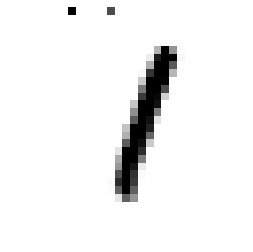

In [29]:
pic = ttimg
pic = pic.reshape(28, 28)
plt.imshow(pic, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")

#save_fig("some_digit_plot")
plt.show()

In [30]:
imm=tf.constant(ttimg)
loog = tf.matmul(imm, wei) + bbs 
preds = tf.nn.softmax(loog)
correct_preds = tf.argmax(preds, 1)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(loog))
    print(sess.run(correct_preds))

[[-13.014776     8.568628     1.8651065   -0.2053209   -6.1562977
   -4.3843813   -7.02959      2.1677136    0.27692294  -2.8683505 ]]
[1]
